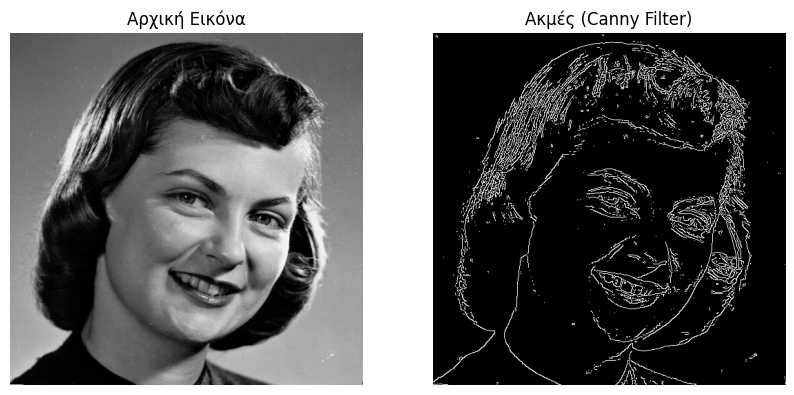

In [9]:
import cv2
import matplotlib.pyplot as plt

# Loading the image on grayscale
img = cv2.imread('girlface.jpg', cv2.IMREAD_GRAYSCALE)

# Canny Edge Detection
edges = cv2.Canny(img, 100, 100)

# Showing the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Αρχική Εικόνα")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Ακμές (Canny Filter)")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


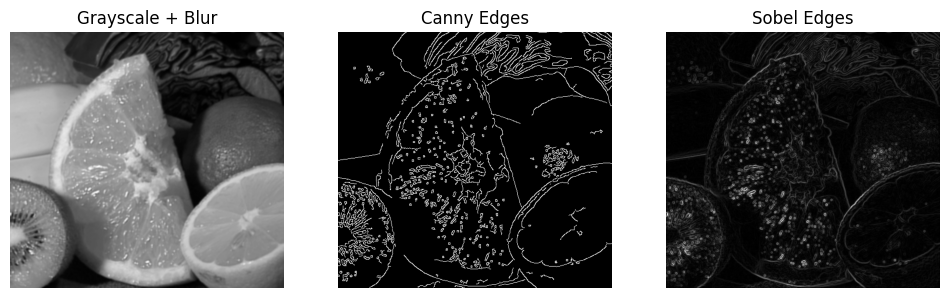

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Loading the image on grayscale
img = cv2.imread('fruits.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny Edge Detection
edges = cv2.Canny(blur, 40, 100)

# Sobel Edge Detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Οριζόντιος
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Κάθετος

# Sobel Edge Detection combined
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))  # Κανονικοποίηση


# 5. Printing the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Grayscale + Blur")
plt.imshow(blur, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Canny Edges")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Sobel Edges")
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.show()


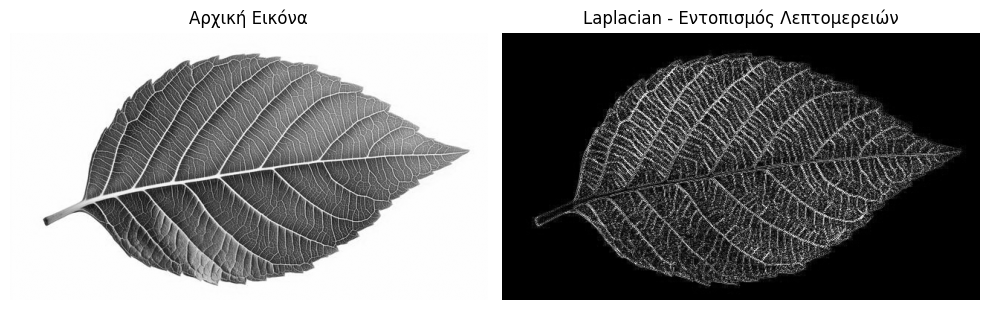

In [15]:
import cv2
import matplotlib.pyplot as plt

# Loading image on Grayscale
img = cv2.imread('leaf.jpg', cv2.IMREAD_GRAYSCALE)

# Applying Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Showing before and after results
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("Αρχική Εικόνα")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Laplacian - Εντοπισμός Λεπτομερειών")
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


